# ICD - Projeto final: The UFC


## 1. Introdução e motivação:


Artes marciais mistas (MMA) é um esporte de combate de contato que permite golpear e agarrar, tanto em pé quanto no chão, usando técnicas de outros esportes de combate e artes marciais. O Ultimate Fighting Championship (UFC) é uma organização americana de artes marciais mistas sediada em Las Vegas, Nevada e é a maior promoção de MMA do mundo. Além disso, o UFC apresenta os lutadores mais bem classificados do esporte. Sediado nos Estados Unidos, essa competição produz eventos em todo o mundo que mostram doze divisões de peso e cumprem as Regras Unificadas de Artes Marciais Mistas. Este é um esporte altamente imprevisível.

O objetivo do trabalho é analisar a suposta 'imprevisibilidade' do UFC/MMA e tentar descobrir quais fatores presentes em um lutador podem ou não aumentar a possibiliadde de vitória. Os dados aqui utilizados foram retirados de um dataset do site kaggle , que recolhe dados de lutas realizadas no UFC, bem como as principais características dos participantes de cada uma delas. Algumas características dos dados serão analisadas a seguir.


### 1.1 Perguntas:

   * A idade tem uma distribuição uniformemente aleatória para o vencedor?
   * Quais atributos e configurações de luta aumentam a possibilidade de vitória?
   * É possivel prever o resultado de uma luta baseado nos atributos dos lutadores?


### 1.2 Importando dependências e abrindo o banco:

Analisando os dados abaixo, é importante ressaltar que  cada linha do dataset é relativa a uma luta. As colunas que se iniciam com a letra 'R' são referentes ao lutador _RED_, ou seja o lutador _vermelho_. Assim como aquelas colunas que se iniciam com a letra 'B'  são relativos ao lutador _azul_. Essa é uma forma que o esporte utiliza de identificar os lutadores. Essa classificação de _vermelho_ ou _azul_ também será discutida posteriormente.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy as spy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Definindo as colunas que serão utilizadas 
columns = [
    "date",
    "R_fighter",  # R = red (lutador de luvas vermelhas)
    "B_fighter",  # B = blue (lutador de luvas azuis)
    "Winner",
    "weight_class",
    "no_of_rounds",
    "B_wins", 
    "R_wins", 
    "B_losses", 
    "R_losses", 
    "B_age", 
    "R_age", 
    "R_Height_cms",
    "R_Reach_cms",
    "R_Weight_lbs",
    "B_Height_cms",
    "B_Reach_cms",
    "B_Weight_lbs",
    "R_Stance",
    "B_Stance"
]
data = pd.read_csv("ufcdata/data.csv",encoding='latin-1', usecols=columns)
data.head()

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_losses,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_losses,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,2019-06-08,Red,Bantamweight,5,1.0,4.0,Orthodox,167.64,170.18,135.0,2.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,Red,Women's Flyweight,5,6.0,4.0,Orthodox,167.64,167.64,125.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,2019-06-08,Red,Lightweight,3,8.0,23.0,Orthodox,185.42,185.42,155.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,2019-06-08,Blue,Bantamweight,3,0.0,4.0,Switch,170.18,170.18,135.0,2.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,Blue,Heavyweight,3,1.0,1.0,Southpaw,180.34,185.42,250.0,1.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0



## 2. Exploração dos dados


### 2.1 Número médio de rounds por ano

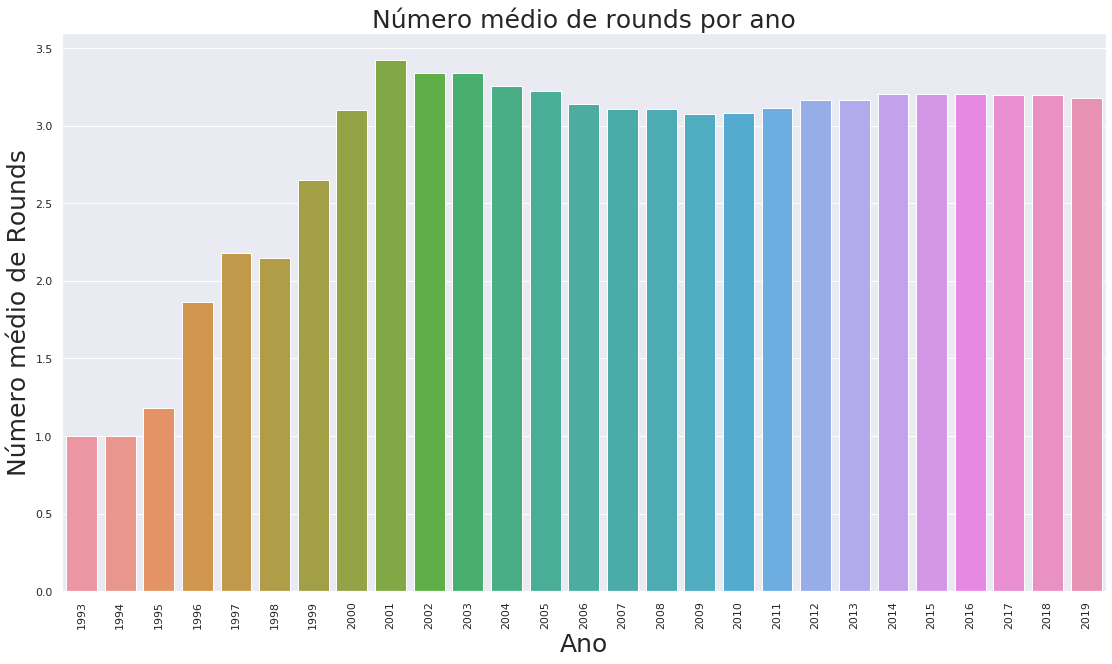

In [9]:
# get db copy
dbcopy = data.copy()

# get only year of date
year = []
for index,row in data.iterrows():
    year.append(row.date[0:4])

# add year in db copy    
dbcopy['year'] = year

years = [
    '2019','2018','2017',     
    '2016','2015','2014','2013',
    '2012','2011','2010','2009',
    '2008','2007','2006','2005',
    '2004','2003','2002','2001',
    '2000','1999','1998','1997',
    '1996','1995','1994','1993'
    ]

#rounds_per_year = dbcopy.groupby('year')
r = dbcopy[['no_of_rounds','year']]

indexYear = 0
mean = 0
roundsArrayMean = []
iterator = 0



for index,line in r.iterrows():
    if (index == len(r)-1):
        mean = mean/iterator
        roundsArrayMean.append(mean)
        
    if(line.year == years[indexYear]):
        mean = line.no_of_rounds + mean
        iterator = iterator + 1
    else:
        mean = mean/iterator
        roundsArrayMean.append(mean)
        mean = 0
        iterator = 0
        indexYear = indexYear + 1
        mean = line.no_of_rounds + mean
        iterator = iterator + 1
        
Data = {
    'Year': years,
    'Mean': roundsArrayMean
}
df = pd.DataFrame(Data, columns=['Year', 'Mean'])
        
chart = sns.barplot(x='Year',y='Mean', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# set chart size
sns.set(rc={'figure.figsize':(18.7,10.27)})
# Título do plot
plt.title("Número médio de rounds por ano", fontsize=25)
# Nome do eixo x
plt.xlabel('Ano', fontsize=25)
# Nome do eixo y
plt.ylabel('Número médio de Rounds', fontsize=25)
plt.show()

A análise dos dados acima permite concluir que lutas ocorridas na década de 90 tendem a ter um número menor de rounds. Isso provavelmente está relacionado com a própria evolução do esporte(das próprias regras em si) e também da qualidade dos lutadores, que tendem a realizar lutas mais demoradas (onde não ocorre nocaute).



### 2.2 Número de vitórias por lutador (quem é o mais vitorioso?)

In [10]:
dbcopy = data.copy()
winners = []
for index,row in dbcopy.iterrows():
    if (row.Winner == 'Red'):
        winners.append(row.R_fighter)
    else:
        winners.append(row.B_fighter)
        
victoryCount = []
for winner in winners:
    victoryCount.append(winners.count(winner))
    
Data = {
    'Fighter': winners,
    'WinsCount': victoryCount
}
df = pd.DataFrame(Data, columns=['Fighter', 'WinsCount'])
df = df.drop_duplicates()
df = df.sort_values(by=['WinsCount'], ascending=False).reset_index()
df.head()

,index,Fighter,WinsCount
0,50,Donald Cerrone,23
1,1269,Michael Bisping,20
2,199,Demian Maia,20
3,793,Georges St-Pierre,20
4,149,Jon Jones,19


Nessa tabela temos o ranking de lutadores por número de vitórias. Especificamente, os cinco lutadores mais vitoriosos da história do UFC.


### 2.3 Postura de luta mais vitoriosa (em porcentagem)


Explicando uma pouco melhor, cada lutador possui a chamada _postura de luta_. Essa postura define como os braços e as pernas estão posicionados e qual dos lados (esquerdo ou direito) é o principal para atacar e o principal para defender. Aqui, será analisado qual postura tem maior porcentagem de vitória.

,Stance,WinsCount,LossCount,VictoryPercentage
0,Orthodox,3781,3855,49.515453
1,Southpaw,1063,948,52.859274
2,Switch,165,153,51.886792
4,Open Stance,13,11,54.166667
5,Sideways,2,4,33.333333


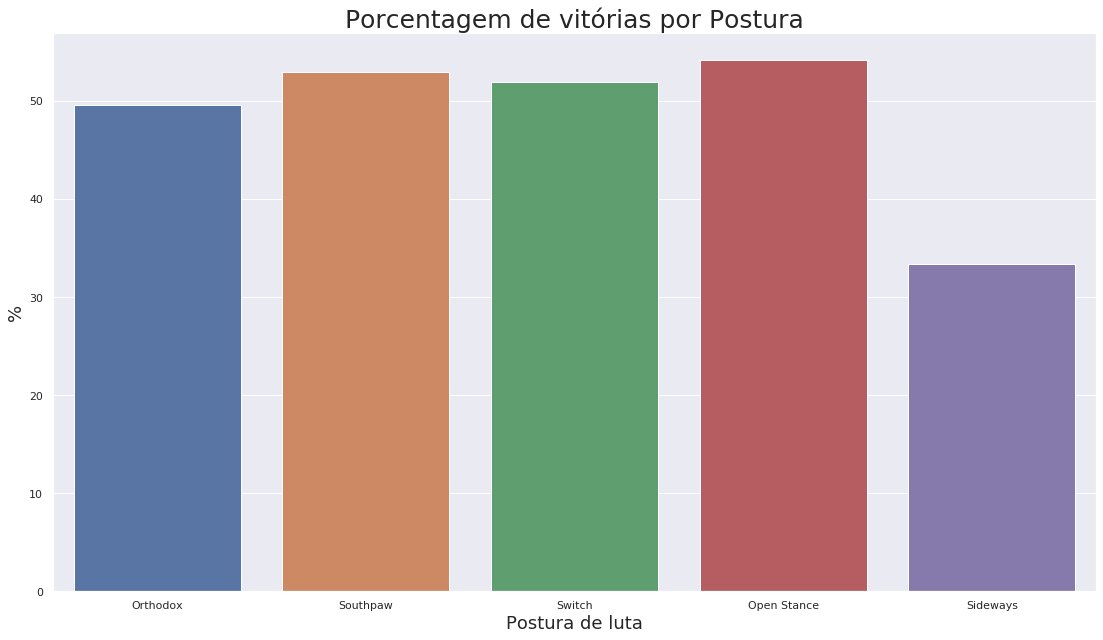

In [11]:
dbcopy = data.copy()
stancesWinners = []
stancesLosers = []
for index, row in dbcopy.iterrows():
    if (row.Winner == 'Red'):
        stancesWinners.append(row.R_Stance)
        stancesLosers.append(row.B_Stance)
    else:
        stancesWinners.append(row.B_Stance)
        stancesLosers.append(row.R_Stance)

victoryCount = []
for stance in stancesWinners:
    victoryCount.append(stancesWinners.count(stance))

loserCount = []
for stance in stancesLosers:
    loserCount.append(stancesLosers.count(stance))

Data = {
    'Stance': stancesWinners,
    'WinsCount': victoryCount
}
df = pd.DataFrame(Data, columns=['Stance', 'WinsCount'])
df = df.drop_duplicates()
df = df.sort_values(by=['WinsCount'], ascending=False)
#display(df)

Data2 = {
    'Stance': stancesLosers,
    'LossCount': loserCount
}
df2 = pd.DataFrame(Data2, columns=['Stance', 'LossCount'])
df2 = df2.drop_duplicates()
df2 = df2.sort_values(by=['LossCount'], ascending=False)
#display(df2)

merged_inner = pd.merge(left=df,right=df2, left_on='Stance', right_on='Stance')
merged_inner = merged_inner.dropna()

percentageArray = []

for index,row in merged_inner.iterrows():
    percentage = (row.WinsCount/(row.WinsCount + row.LossCount))*100
    percentageArray.append(percentage)
    
merged_inner['VictoryPercentage'] = percentageArray
display(merged_inner)

chart = sns.barplot(x='Stance',y='VictoryPercentage', data=merged_inner)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# set chart size
#sns.set(rc={'figure.figsize':(18.7,10.27)})

# Título do plot
plt.title("Porcentagem de vitórias por Postura", fontsize=25)
# Nome do eixo x
plt.xlabel('Postura de luta', fontsize=18)
# Nome do eixo y
plt.ylabel('%', fontsize=18)
plt.show()

A análise dos dados permite concluir que a postura masi vitoriosa é a Open Stace_, porém vale ressaltar que ela foi utlizada nas lutas do UFC um número bastante pequeno de vezes quando comparada com outras posturas (então não existem tantos dados para avaliação). Além disso, aquelas que são utilizadas com frequência possuem uma porcentagem de vitórias bem parecida (em torno de 50%). Mesmo assim, dessas, a melhor classificada é a _South Paw_. 


## 3. Limpando os dados

O nosso .csv veio com algumas tuplas com elementos nulos, o que dificultava nossa análise nas partes dos testes e regressões. Assim, tiramos as linhas onde algumas colunas não tinham dados, pois os dados restantes dessas tuplas não eram relevantes para nossas análises. Dessa forma:

In [12]:
data = pd.read_csv("ufcdata/data.csv",encoding='latin-1', usecols=columns)
data = data[np.isfinite(data['R_Reach_cms'])]
data = data[np.isfinite(data['B_Reach_cms'])]
data = data[np.isfinite(data['no_of_rounds'])]
data = data[np.isfinite(data['B_wins'])]
data = data[np.isfinite(data['R_wins'])]
data = data[np.isfinite(data['B_losses'])]
data = data[np.isfinite(data['R_losses'])]
data = data[np.isfinite(data['R_age'])]
data = data[np.isfinite(data['B_age'])]
data = data[np.isfinite(data['R_Weight_lbs'])]
data = data[np.isfinite(data['B_Weight_lbs'])]
data = data[np.isfinite(data['B_Height_cms'])]
data = data[np.isfinite(data['R_Height_cms'])]

data.head()

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_losses,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_losses,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,2019-06-08,Red,Bantamweight,5,1.0,4.0,Orthodox,167.64,170.18,135.0,2.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,Red,Women's Flyweight,5,6.0,4.0,Orthodox,167.64,167.64,125.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,2019-06-08,Red,Lightweight,3,8.0,23.0,Orthodox,185.42,185.42,155.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,2019-06-08,Blue,Bantamweight,3,0.0,4.0,Switch,170.18,170.18,135.0,2.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,Blue,Heavyweight,3,1.0,1.0,Southpaw,180.34,185.42,250.0,1.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0



## 4. Testes de hipótese e intervalos de confiância:


### 4.1. A idade tem uma distribuição uniformemente aleatória para o vencedor?

Vamos mensurar a diferença de idade entre ganhador e perdedor em um mundo aleatório.

Para ganhadores no lado Vermelho:

    Hipotese Nula: Seleção aleatória.

Para que não soframos do paradoxo Simpson, envolvendo as categorias de Peso Pesado, Peso Leve e Peso Médio.

Para cada uma dessas classificações, faremos um Teste de Permutação para verificar se a idade tem grande influência nas lutas. Para isso, iremos fazer permutações repetidas vezes entre os ganhadores e perdedores e mensurar a diferença de suas idades, para que a "Lei dos Grandes Números" nos mostre qual é a média da diferença das idades em um cenário onde o vencedor é selecionado uniformemente de forma aleatoria, e então comparar o valor observado nos dados com o resultado obtido pelo Teste de Permutação.


### 4.1.1 Peso Pesado

Para ganhadores no lado Vermelho:

In [13]:
heavyWeigthData = data[data["weight_class"] == "Heavyweight"]
heavyWeigthData.head()

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_losses,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_losses,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,Blue,Heavyweight,3,1.0,1.0,Southpaw,180.34,185.42,250.0,1.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
54,Walt Harris,Serghei Spivac,2019-05-04,Red,Heavyweight,3,0.0,0.0,Orthodox,190.50,198.12,260.0,7.0,4.0,Southpaw,195.58,195.58,250.0,24.0,35.0
60,Arjan Bhullar,Juan Adams,2019-05-04,Red,Heavyweight,3,0.0,1.0,Orthodox,195.58,203.20,265.0,1.0,2.0,Orthodox,185.42,190.50,245.0,27.0,32.0
63,Greg Hardy,Dmitrii Smoliakov,2019-04-27,Red,Heavyweight,3,2.0,0.0,Switch,187.96,187.96,253.0,1.0,0.0,Orthodox,195.58,203.20,265.0,36.0,30.0
69,Andrei Arlovski,Augusto Sakai,2019-04-27,Blue,Heavyweight,3,0.0,1.0,Orthodox,190.50,195.58,265.0,12.0,16.0,Orthodox,190.50,195.58,240.0,27.0,40.0


In [19]:
filtro = heavyWeigthData["Winner"] == "Red"
valor_observado = heavyWeigthData[filtro]["R_age"].mean() - heavyWeigthData[~filtro]["B_age"].mean()
valor_observado

-0.30084835630965046

In [20]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = heavyWeigthData[filtro]["R_age"].mean() - heavyWeigthData[~filtro]["B_age"].mean()
    diferencas[i] = diff

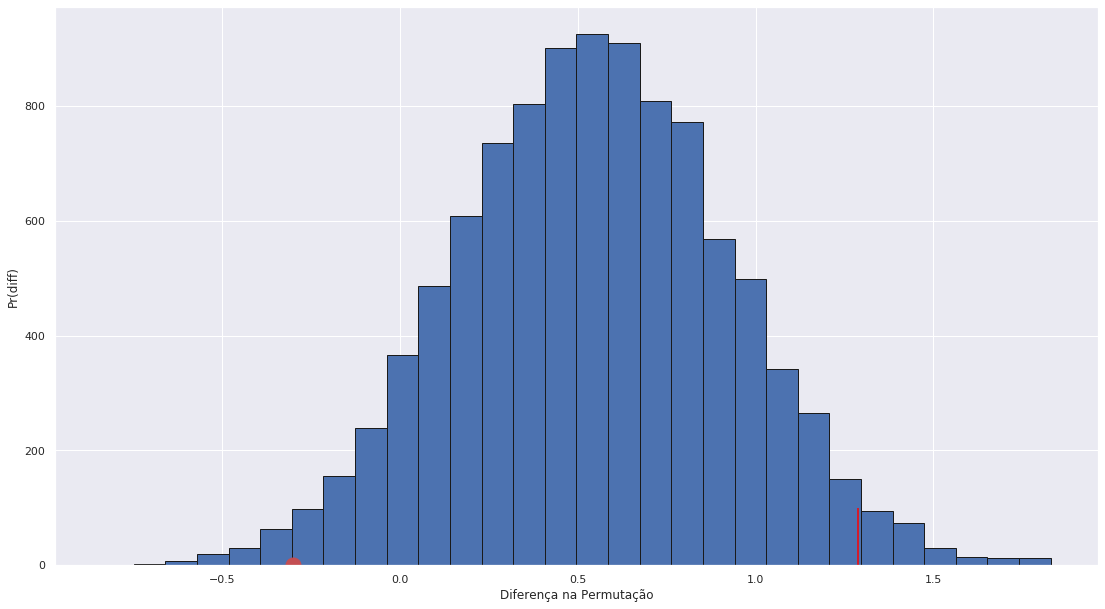

In [21]:
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 97.5), 0 , 100, color="red")
plt.show()

Para ganhadores no lado Azul:

In [22]:
filtro = heavyWeigthData["Winner"] == "Blue"
valor_observado = heavyWeigthData[filtro]["B_age"].mean() - heavyWeigthData[~filtro]["R_age"].mean()
valor_observado

0.10078951180646101

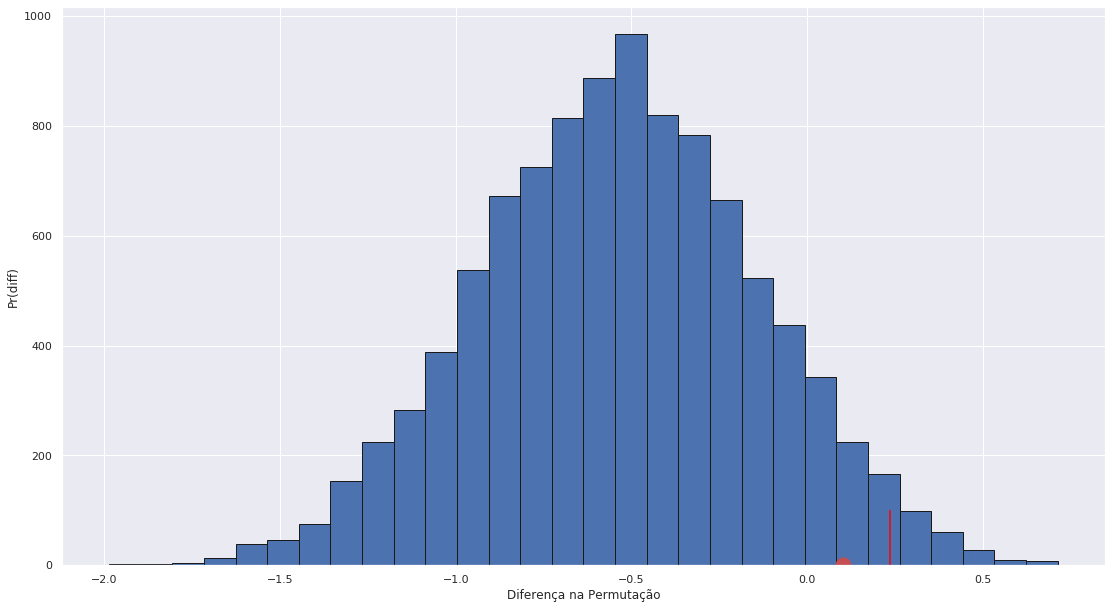

In [23]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = heavyWeigthData[filtro]["B_age"].mean() - heavyWeigthData[~filtro]["R_age"].mean()
    diferencas[i] = diff
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 97.5), 0 , 100, color="red")
plt.show()

Podemos observar, pelo nosso Teste de Permutação, que os valores observados estão fora do intervalo de confiança para lutadores vitoriosos tanto no lado esquerdo quando no direito, sendo assim, podemos rejeitar a hipotese nula no caso de lutadores na categoria de Peso Pesado.

### 4.1.2 Peso Médio

Para ganhadores no lado Vermehlo:

In [24]:
WeigthData = data[data["weight_class"] == "Middleweight"]

In [25]:
filtro = WeigthData["Winner"] == "Red"
valor_observado = WeigthData[filtro]["R_age"].mean() - WeigthData[~filtro]["B_age"].mean()
valor_observado

0.6460024154589377

In [26]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = WeigthData[filtro]["R_age"].mean() - WeigthData[~filtro]["B_age"].mean()
    diferencas[i] = diff

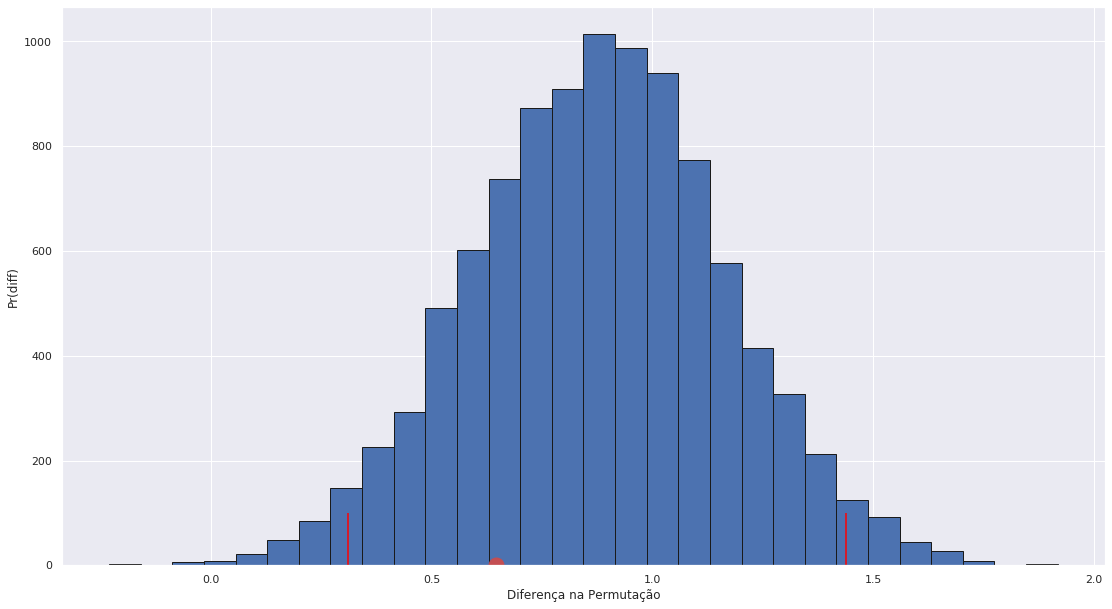

In [27]:
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 97.5), 0 , 100, color="red")
plt.vlines(np.percentile(diferencas, 2.5), 0 , 100, color="red")

plt.show()

Para ganhadores no lado Azul:

In [28]:
filtro = WeigthData["Winner"] == "Blue"
valor_observado = WeigthData[filtro]["B_age"].mean() - WeigthData[~filtro]["R_age"].mean()
valor_observado

-0.6838083538083524

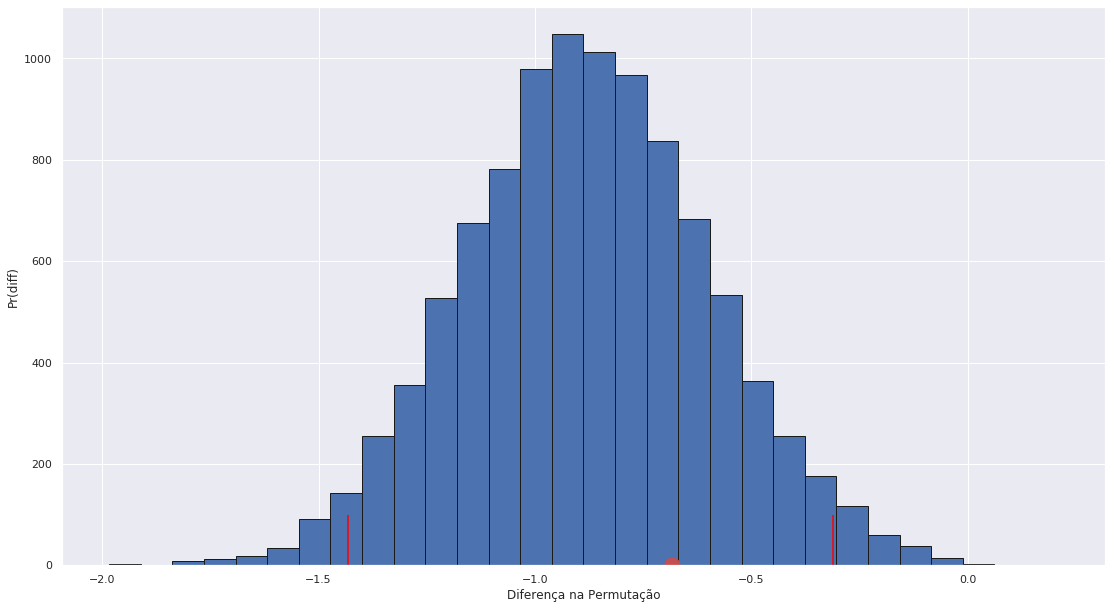

In [29]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = WeigthData[filtro]["B_age"].mean() - WeigthData[~filtro]["R_age"].mean()
    diferencas[i] = diff
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 97.5), 0 , 100, color="red")
plt.vlines(np.percentile(diferencas, 2.5), 0 , 100, color="red")

plt.show()

Podemos observar, pelo nosso Teste de Permutação, que os valores observados estão fora do intervalo de confiança para lutadores vitoriosos tanto no lado esquerdo quando no direito, sendo assim, podemos rejeitar a hipotese nula no caso de lutadores na categoria de Peso Médio.

### 4.1.3 Peso Leve

Para ganhadores no lado Vermelho:

In [31]:
WeigthData = data[data["weight_class"] == "Lightweight"]

In [32]:
filtro = WeigthData["Winner"] == "Red"
valor_observado = WeigthData[filtro]["R_age"].mean() - WeigthData[~filtro]["B_age"].mean()
valor_observado

-0.12139266205829458

In [33]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = WeigthData[filtro]["R_age"].mean() - WeigthData[~filtro]["B_age"].mean()
    diferencas[i] = diff

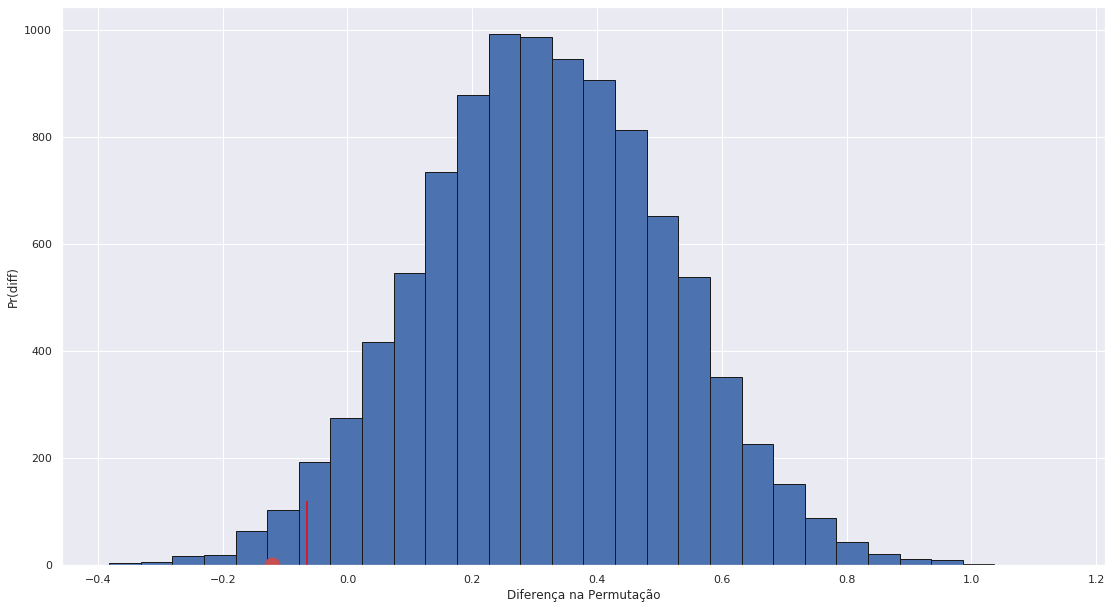

In [34]:
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 2.5), 0 , 120, color="red")
plt.show()

Para ganhadores no lado Azul:

In [35]:
filtro = WeigthData["Winner"] == "Blue"
valor_observado = WeigthData[filtro]["B_age"].mean() - WeigthData[~filtro]["R_age"].mean()
valor_observado

0.11799410029498247

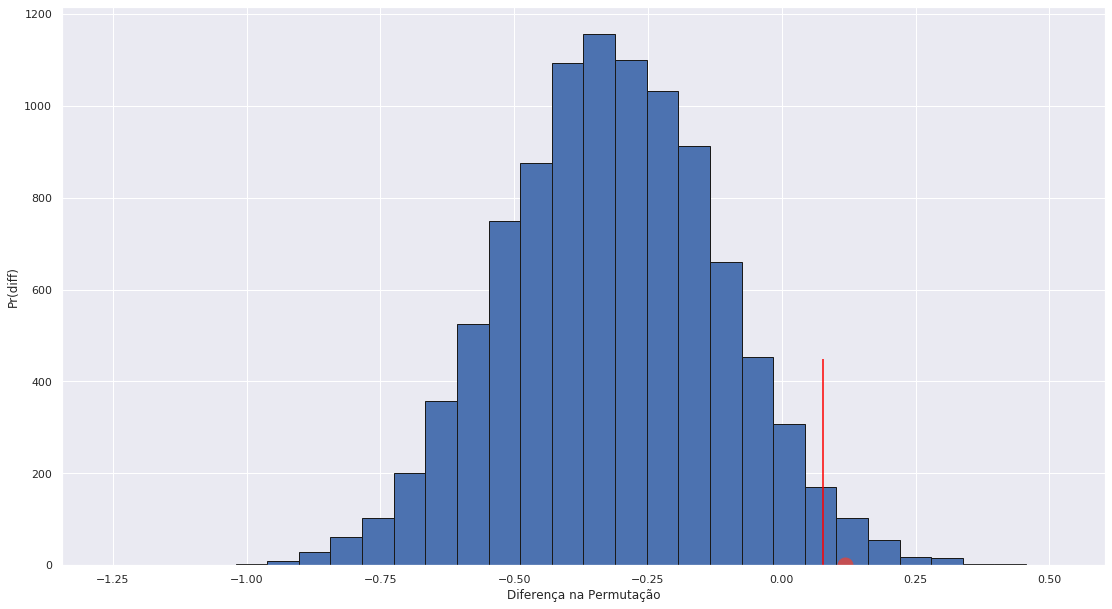

In [36]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = WeigthData[filtro]["B_age"].mean() - WeigthData[~filtro]["R_age"].mean()
    diferencas[i] = diff
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.plot([valor_observado], [0], 'ro', ms=15)
plt.hist(diferencas, bins=30, edgecolor='k')
plt.vlines(np.percentile(diferencas, 97.5), 0 , 450, color="red")
plt.show()

Podemos observar, pelo nosso Teste de Permutação, que os valores observados estão fora do intervalo de confiança para lutadores vitoriosos tanto no lado esquerdo quando no direito, sendo assim, podemos rejeitar a hipotese nula no caso de lutadores na categoria de Peso Leve.

Para cada peso podemos concluir que:
     
   * Peso Pesado: Os dados observados nos nossos testes indicam que para vencedores no lado vermelho, a idade tem influência, pois o valor visto no mundo real possui valor fora do intervalo de confiança, porém o mesmo não ocorre para lutadores no lado azul.
   * Peso Médio: Os dados observados nos nossos testes indicam que a idade não tem influência nos resultados das lutas pois os valores observados estão dentro do intervalo de confiança.
   * Peso Leve: Independente do lado que o lutador se encontra, a diferença de idade tem inflência no resultado final da luta.

#### Observações:

Durante o estudo do dataset, notamos que geralmente, lutadores que lutam no lado vermelho tendem a ganhar mais lutas.

In [37]:
filtro = WeigthData["Winner"] == "Red"
WeigthData[filtro]["Winner"].count() - WeigthData[~filtro]["Winner"].count()

246

Após isso, fizemos uma pesquisa e vimos que na UFC, a escolha dos lados são feitas através do sistema de ranqueamento da competição, com o lutador com ranking mais alto usando a luva vermelha, e o lutador com menor ranking usando a luva azul. Logo, faz sentido os resultados serem historicamente favoraveis ao lado vermelho, já que estes estão acima no ranking geral da UFC.

## 5. Regressão e Classificação

### 5.2 É possivel prever o resultado de uma luta baseado nos atributos dos lutadores?

### Regressão Logística Multivalorada

In [40]:
wdata = data[data["weight_class"] == "Heavyweight"]

Y = wdata["Winner"]
X = wdata[[
    "B_wins", 
    "R_wins", 
    "B_losses", 
    "R_losses", 
    "B_age", 
    "R_age", 
    "R_Height_cms",
    "R_Reach_cms",
    "R_Weight_lbs",
    "B_Height_cms",
    "B_Reach_cms",
    "B_Weight_lbs"
]]

In [41]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')
X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(X, Y)
logistic = logistic.fit(X_Treino, Y_Treino)
score = logistic.score(X_Teste, Y_Teste)
print("precisão:", score)

precisão: 0.5617977528089888


### KNN

In [42]:
def precisao(k, X, Y):
    xTreino, xValidacao, yTreino, yValidacao = train_test_split(X, Y, test_size=0.25, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(xTreino, yTreino)
    validacao = knn.predict(xValidacao)
    return accuracy_score(yValidacao, validacao)

bestk =(0, 0)
for i in [1,2,3,4,5,6,7,8,9,10]:
    p = precisao(i, X, Y)
    if(p > bestk[1]):
        bestk = (i, p)

k, acc = bestk

print("k:", k)
print("accuracy:", acc)


k: 4
accuracy: 0.6629213483146067


Utilizando nossos dados, é possivel prever o resultado de uma luta utilizando os atributos dos lutadores, com precisão de maior ou igual à 60%